In [2]:
import numpy as np
import grid_world_class as gw
import riverswim_class as rs 
import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(rs)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(utils)
import matplotlib.pyplot as plt

GridWorld

In [5]:
env_smdp = gw.grid_world(nS=36, T_max=1)
env_ucrl = gw.grid_world(nS=36, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=36, nA = 4, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 1)
Bus_ucrl = ucrlS.BUS(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6]))
Bus2_ucrl = ucrlS.BUS2(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]))
_,_,_,gstar = utils.VI(env_ucrl)


In [6]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**7)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**7)

In [7]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**7)

reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**7)
#reward_sucrl_low,tau_sucrl_low = utils.run_experiment(env_smdp, smdp_ucrl_low, T = 10**7)
#reward_sucrl_high,tau_sucrl_high = utils.run_experiment(env_smdp, smdp_ucrl_high, T = 10**7)

In [8]:
print(np.mean(reward_sucrl),
np.mean(reward_ucrl),
np.mean(reward_bus),
np.mean(reward_bus2)
)

0.076724 0.0569715 0.0757417 0.0426232


In [9]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
#regret_sucrl_low = utils.calc_regret(reward=reward_sucrl_low, tau = tau_sucrl_low, optimal_gain=gstar)
#regret_sucrl_high = utils.calc_regret(reward=reward_sucrl_high, tau = tau_sucrl_high, optimal_gain=gstar)



In [10]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

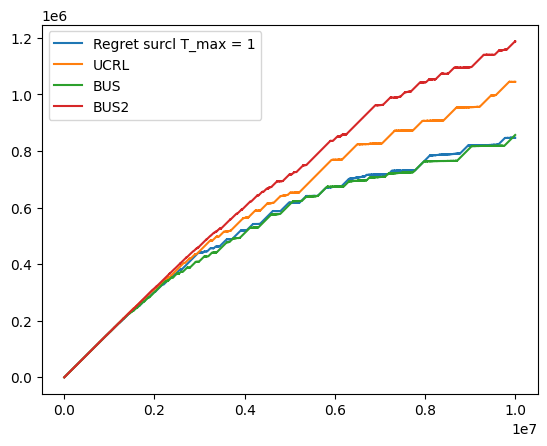

In [12]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 1")
#plt.plot(regret_sucrl_low, label = "Regret surcl T_max = 2")
#plt.plot(regret_sucrl_high, label = "Regret surcl, T_max = 4")


plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.legend()

In [ ]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
#Bus_ucrl.n_episodes

Probs, BUS [0.69781623 0.16349809 0.13868568] Probs, BUS2 [0.3890003  0.19306725 0.41793245]


In [ ]:
env_smdp = gw.grid_world(nS=64, T_max=4)
env_ucrl = gw.grid_world(nS=64, T_max=1)

ucrl_naive = ucrl.UCRL2(nS=64, nA = 4, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 64, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4)
Bus_ucrl = ucrlS.BUS(nS = 64, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6,8]))
Bus2_ucrl = ucrlS.BUS2(nS = 64, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6,8]))
_,_,_,gstar = utils.VI(env_ucrl)

In [ ]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 3*10**7)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 3*10**7)

In [ ]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 3*10**7)
reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 3*10**7)
#reward_sucrl_low,tau_sucrl_low = utils.run_experiment(env_smdp, smdp_ucrl_low, T = 10**7)
#reward_sucrl_high,tau_sucrl_high = utils.run_experiment(env_smdp, smdp_ucrl_high, T = 10**7)

In [ ]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
#regret_sucrl_low = utils.calc_regret(reward=reward_sucrl_low, tau = tau_sucrl_low, optimal_gain=gstar)
#regret_sucrl_high = utils.calc_regret(reward=reward_sucrl_high, tau = tau_sucrl_high, optimal_gain=gstar)


In [ ]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

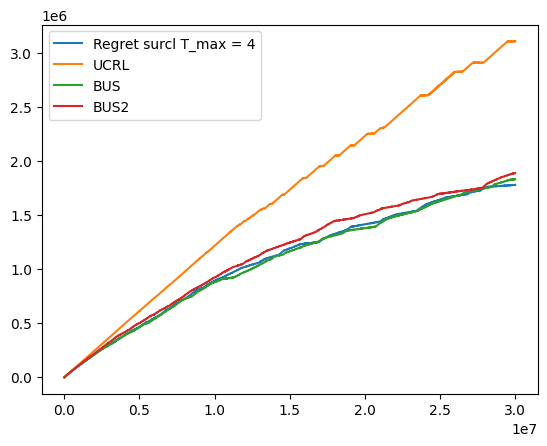

In [ ]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
#plt.plot(regret_sucrl_low, label = "Regret surcl T_max = 2")
#plt.plot(regret_sucrl_high, label = "Regret surcl, T_max = 4")


plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.legend()

In [ ]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
#Bus_ucrl.n_episodes

Probs, BUS [0.16989104 0.23303971 0.10403136 0.49303789] Probs, BUS2 [0.05609029 0.6109954  0.17949616 0.15341814]


RiverSwim

In [135]:
env_smdp = rs.riverswim(nS=10, T_max=4)
env_ucrl = rs.riverswim(nS=6, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=10, nA = 2, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4)
Bus_ucrl = ucrlS.BUS(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6,8]))
Bus2_ucrl = ucrlS.BUS2(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6,8]))
_,_,_,gstar = utils.VI(env_ucrl)
print(gstar)
print(utils.QL_SMDP(env_ucrl,T=10**4))



0.4626994555955801
[0 0 0 0 0 0]


In [111]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**6)
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**6)
reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**6)

In [112]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

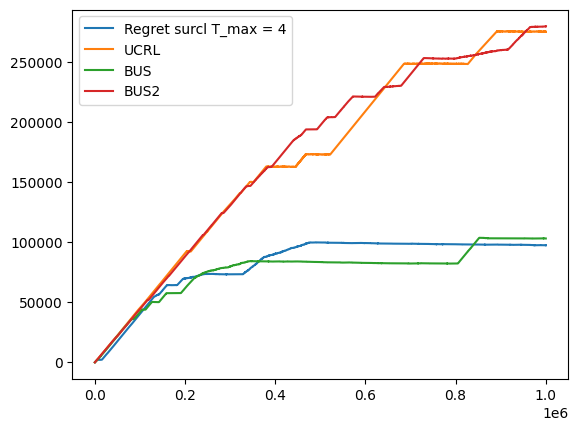

In [113]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")

plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.legend()

In [114]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
#Bus_ucrl.n_episodes

Probs, BUS [0.15026926 0.07165867 0.44187594 0.33619612] Probs, BUS2 [0.52370446 0.16518446 0.19375277 0.11735832]
